[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

# [RQ3] Do the all trips last the same? 

In [3]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions

In [5]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [3]:
trip_duration=[]
for i,df_name in enumerate (df_names):
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=100000)
        #
        trip_duration.append(round((df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm'),2))
trip_duration=pd.concat(trip_duration)

In [4]:
#chechked if there is inconsistency with trip durations(e.g. negative and zero values) and use only positive values for plotting 
trip_duration[trip_duration<=0].count()

4

In [ ]:
trip_duration[trip_duration>0].head()

In [7]:
trip_duration=trip_duration[trip_duration>0]

In [8]:
len(trip_duration)

5996

In [9]:
mean=trip_duration.mean()
mean

14.824919946631075

In [10]:
std=trip_duration.std()
std

62.81478192299662

In [11]:
#trip_duration_by_minute=trip_duration.apply(lambda x : int(round(x)))

# 5-minute interval

In [12]:
trip_duration_by_5minutes=trip_duration.groupby(pd.cut(trip_duration, np.arange(0, trip_duration.max()+1, 5))).count()
#.resample("5T")

In [13]:
trip_duration_by_5minutes.head(10)

(0.0, 5.0]      1189
(5.0, 10.0]     1897
(10.0, 15.0]    1211
(15.0, 20.0]     737
(20.0, 25.0]     414
(25.0, 30.0]     285
(30.0, 35.0]     134
(35.0, 40.0]      71
(40.0, 45.0]      23
(45.0, 50.0]      10
dtype: int64

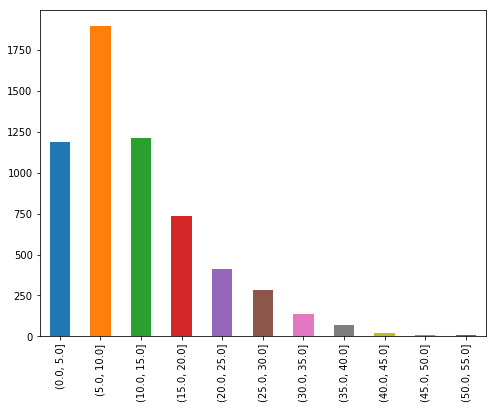

In [31]:
f = plt.figure() 
f.set_figheight(6)
f.set_figwidth(8)
plt.grid(color ='lightgray', linestyle = '-.') 
trip_duration_by_5minutes[trip_duration_by_5minutes>5].plot(kind = 'bar')#,grid=True)
plt.show()

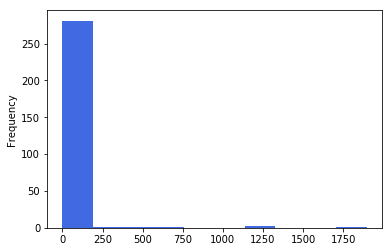

In [15]:
f = plt.figure()
trip_duration_by_5minutes.plot(kind='hist',color='royalblue',density=False)

# 10-minute interval

In [2]:
def make_bins(x):
    x=int(x)
    if x in range(0,10):
        return '0-10min'
    if x in range(10,20):
        return '10-20min'
    elif x in range(20,30):
        return '20-30min'
    elif x>30:
        return '>30min' 

In [17]:
trip_duration_bins=trip_duration.groupby(trip_duration.apply(make_bins)).count()
trip_duration_bins

0-10min     3083
10-20min    1949
20-30min     699
>30min       232
dtype: int64

In [18]:
trip_duration_bins.rename('trip duration')

0-10min     3083
10-20min    1949
20-30min     699
>30min       232
Name: trip duration, dtype: int64

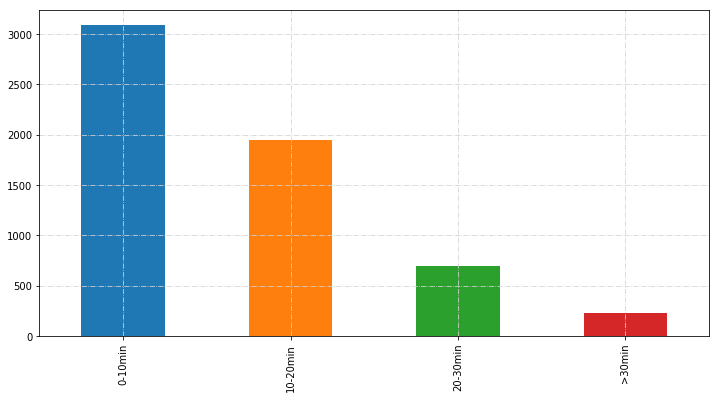

In [19]:
f = plt.figure() 
plt.grid(color ='lightgray', linestyle = '-.') 
f.set_figheight(6)
f.set_figwidth(12) 
trip_duration_bins.plot(kind = 'bar',grid=True)

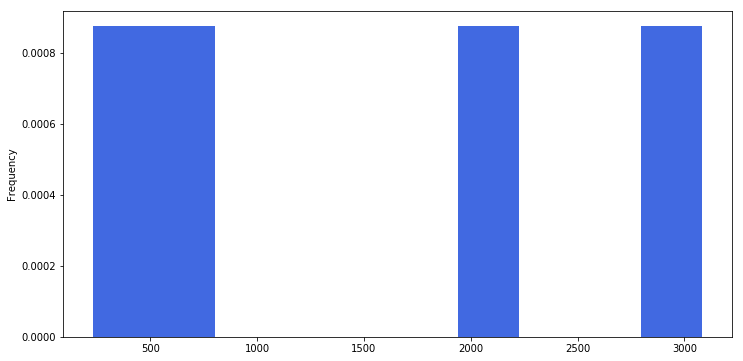

In [20]:
f = plt.figure()
trip_duration_bins.plot(kind='hist',color='royalblue',density=True)
f.set_figheight(6)
f.set_figwidth(12)

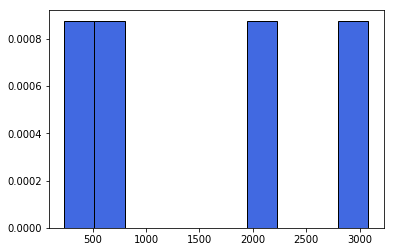

In [21]:
data = trip_duration_bins
#histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(data,edgecolor="black",color='royalblue',histtype='bar',density=True)#,cumulative =True)
plt.show()

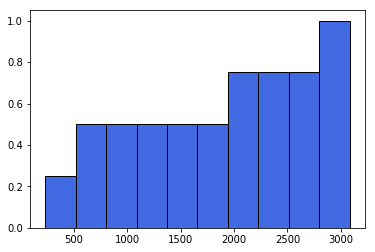

In [22]:
data = trip_duration_bins
#histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(data,edgecolor="black",color='royalblue',histtype='bar',density=True,cumulative=True)
plt.show()

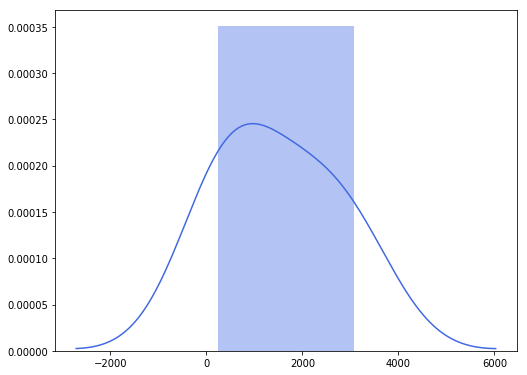

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8.27, 6.27)
ax = sns.distplot(data,hist=True,norm_hist=True,color='royalblue')

In [6]:
#def payments_per_borough(borough_lst):
trip_duration_df=pd.DataFrame()
for i,df_name in enumerate(df_names): #repeating it for every file(aka month) 
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=100000)
        # merging it with taxi_zone_lookup file(left-join) 
        df=pd.merge(df,taxi_zone_lookup,how='left',left_on='PULocationID',right_on='LocationID')
        df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 'm')
  
        trip_duration_df=trip_duration_df.append(df.loc[:,['trip_duration','Borough']])

In [7]:
trip_duration_df.shape

(600000, 2)

In [8]:
trip_duration_df.head()

,trip_duration,Borough
0,5.766667,Manhattan
1,24.650000,Manhattan
2,4.216667,Manhattan
3,5.933333,Manhattan
4,3.533333,Manhattan


In [9]:
trip_duration_df['trip_duration']=trip_duration_df.trip_duration.apply(make_bins)

In [10]:
trip_duration_df['counter']=1

In [11]:
tp=trip_duration_df.groupby(['Borough','trip_duration']).count()

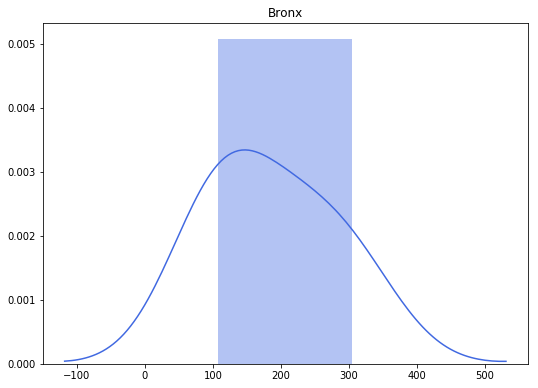

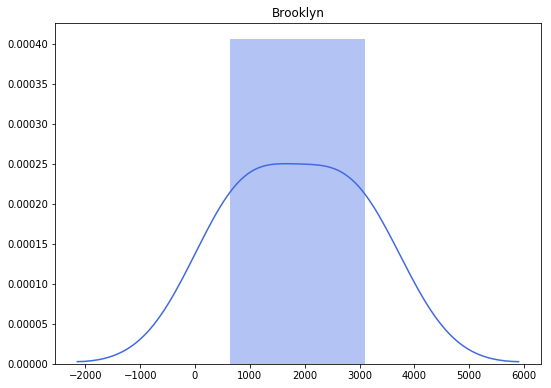

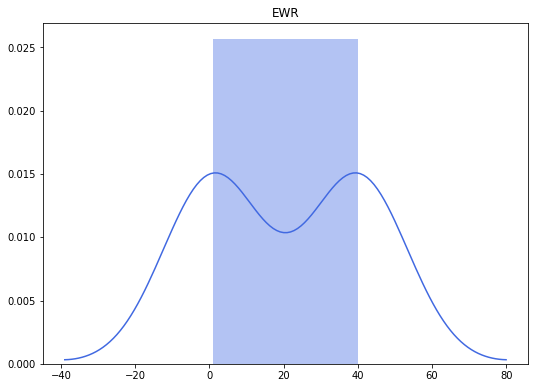

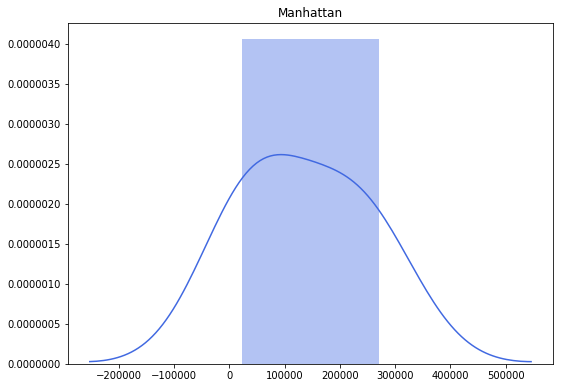

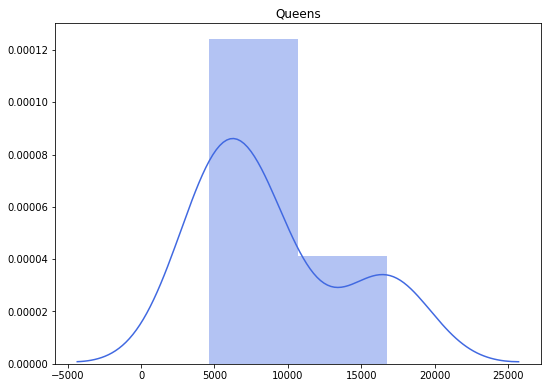

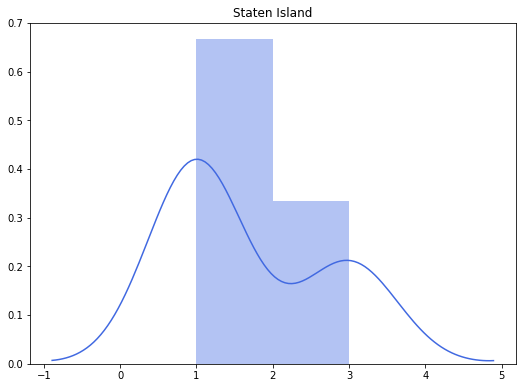

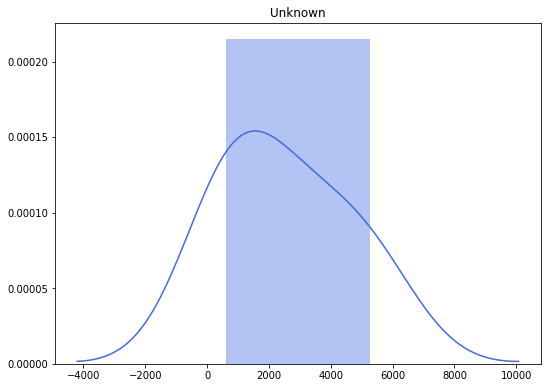

In [12]:
for bor in borough_lst:
    fig, ax = plt.subplots()
    fig.set_size_inches(8.7, 6.27)
    plt.title(bor)
    ax = sns.distplot(tp.loc[bor],hist=True,norm_hist=True,color='royalblue')

## hehe I wish 
